In [49]:
W_START: int = 5146
N: int = 10000
K_0: int = 13849
K_1: int = 25173
Q: int = 65536
ALPHA: float = 0.05

def linear_generator():
    i = 0
    w = W_START
    while i < Q:
        new_w = (K_1 * w + K_0) % Q
        yield new_w/Q
        w = new_w
        if i + 1 < Q:
            i += 1
        else:
            i = 0
            
gen = linear_generator()
results = [next(gen) for _ in range(N)] 
# print(results)

[0.8387908935546875, 0.094482421875, 0.6173248291015625, 0.129241943359375, 0.6187591552734375, 0.23553466796875, 0.3255157470703125, 0.419219970703125, 0.2356414794921875, 0.0142822265625, 0.7378082275390625, 0.057830810546875, 0.9863128662109375, 0.66510009765625, 0.7760772705078125, 0.404449462890625, 0.4176483154296875, 0.67236328125, 0.6121978759765625, 0.068450927734375, 0.3265228271484375, 0.77044677734375, 0.6680450439453125, 0.909210205078125, 0.7598114013671875, 0.9437255859375, 0.6154937744140625, 0.036102294921875, 0.0143890380859375, 0.42657470703125, 0.3764190673828125, 0.808502197265625, 0.6371307373046875, 0.703369140625, 0.1226959228515625, 0.835784912109375, 0.4249114990234375, 0.50848388671875, 0.2761993408203125, 0.977325439453125, 0.4246063232421875, 0.8262939453125, 0.5088043212890625, 0.342498779296875, 0.9330902099609375, 0.89117431640625, 0.7423858642578125, 0.290679931640625, 0.4972381591796875, 0.1875, 0.1488189697265625, 0.431243896484375, 0.9139251708984375

In [51]:
import numpy as np
from scipy.stats import chi2

m = int(np.log2(N) + 1)
observed_freq = {i: 0 for i in range(m)}
for val in results:
    idx = int(val * m)
    observed_freq[idx] += 1
    
# print(observed_freq)
expected_freq = len(results) / m

x_2 = sum([(np.pow((observed_freq[j] - expected_freq), 2)) / expected_freq for j in range(m)])
# print(x_2)

x_cr = chi2.ppf(1-ALPHA, m-1)
# print(x_cr)

print(f"Інтервалів: {m}")
print(f"Статистика X^2: {x_2}")
print(f"Ступенів свободи: {m-1}")
print(f"Критичне знач. X^2 при alpha=={ALPHA}: {x_cr}")
if x_2 <= x_cr:
    print("Розподіл рівномірний")
else:
    print("Розподіл нерівномірний")


Інтервалів: 14
Статистика X^2: 7.7796
Ступенів свободи: 13
Критичне знач. X^2 при alpha==0.05: 22.362032494826938
Розподіл рівномірний


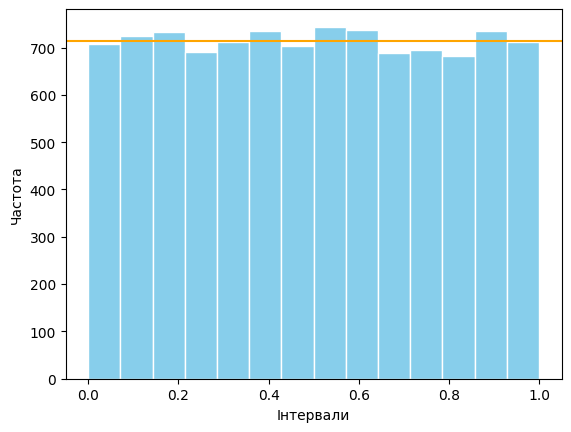

In [61]:
import matplotlib.pyplot as plt

plt.hist(results, bins=m, color='skyblue', edgecolor='white')
plt.xlabel('Інтервали')
plt.ylabel('Частота')
plt.axhline(N/m, color='orange')
plt.im

plt.show()